# 0. Imports

In [1]:
import numpy as np
import scipy as sc
import sympy as sy
import polars as pl
import matplotlib.pyplot as plt

# 1. Álgebra Linear

Estamos acostumados com a álgebra clássica: x + 2 = 5 -> x = 3. Mas e se tivermos uma equação com mais de uma variável? Por exemplo: x + y = 10. Esse tipo de equação com duas incógnitas tem infinitas soluções: independente do valor que coloque em x eu terei um valor de y para que a equação seja verdadeira (pensando em números reais).

Esse tipo de equação (com número de incógnitas maior que o número de equações) é chamado de Equações Diofantinas. O nome vem do matemático Diofante de Alexandria, que viveu no século III. Ele foi o primeiro a estudar esse tipo de equação.

Se eu adicionar mais uma equação ao problema, como por exemplo 2x - y = 11 eu passo a ter duas equações com duas incógnitas, transformando o problema em um sistema de equações.

O objetivo da Álgebra Linear é resolver sistemas de quações lineares. Para isso, vamos usar matrizes e vetores

## 1.1 Escalar, Vetor e Matriz

- Escalar: é um número real qualquer. É um tensor de ordem 0.

In [2]:
escalar  = 2
print(escalar)

2


- Vetor: é um conjunto de números reais. É uma estrutura mais complexa que preciso de um plano cartesiano para visualizar. É um tensor de ordem 1.

In [3]:
# Vetor com elementos sendo escalares
vetor = np.array([1,2,3])
print(vetor)

[1 2 3]


- Matrizes: é um conjunto de vetores. É um tensor de ordem 2. Passo a precisar de três dimensões para visualizar

In [4]:
# Vetor com elementos sendo vetores, com elementos escalares
matriz_coluna = np.array([[1],[2],[3]])
print(matriz_coluna)

[[1]
 [2]
 [3]]


In [5]:
# Vetor com elementos sendo vetores
matriz = np.matrix([[1,2,3],[4, 5, 6],[7, 8, 9]])
print(matriz)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Os Dataframes que manipulamos são simplesmente matrizes e as Series são vetores.

In [6]:
lista = np.array([1,2,3,4])
df = pl.DataFrame({'a': lista, 'b': lista * 2})


In [7]:
print(df)
type(df)

shape: (4, 2)
┌─────┬─────┐
│ a   ┆ b   │
│ --- ┆ --- │
│ i64 ┆ i64 │
╞═════╪═════╡
│ 1   ┆ 2   │
│ 2   ┆ 4   │
│ 3   ┆ 6   │
│ 4   ┆ 8   │
└─────┴─────┘


polars.dataframe.frame.DataFrame

In [8]:
print(df['a'])
type(df['a'])

shape: (4,)
Series: 'a' [i64]
[
	1
	2
	3
	4
]


polars.series.series.Series

## 1.2 Operações com Matrizes e Vetores

As mesmas operações que fazemos com escalares, podem ser feitas com vetores e matrizes.

### Adição e Subtração

Para adicionar ou subtrair vetores e matrizes, basta somar ou subtrair os elementos correspondentes. Para isso, as matrizes e vetores precisam ter a mesma dimensão.

In [9]:
v1 = np.array([1,2,3,4])
v2 = np.array([5,6,7,8])
print(v1 + v2)

[ 6  8 10 12]


Podemos somar também um vetor com uma matriz. Nesse caso a soma se torna uma combinação linerar.

Combinação linear é um somatório de elementos multiplicados entre si. É praticamente uma "distributiva": todos os elementos linha são somados pelos elementos coluna.

In [10]:
print(vetor)
print(matriz_coluna)
print(vetor + matriz_coluna)

[1 2 3]
[[1]
 [2]
 [3]]
[[2 3 4]
 [3 4 5]
 [4 5 6]]


In [11]:
print(vetor)
print(matriz)
print(vetor + matriz)

[1 2 3]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


Na distribuição linear eu só posso somar elementos de mesma ordem. Por exemplo, se eu tenho uma matriz 2x2, eu só posso somar com outra matriz 2x2. Se eu tenho um vetor 2x1, eu só posso somar com outro vetor 2x1.

Nos casos onde eu tenho dimensões diferentes o que predomina é a regra da distributiva. Preciso ter o mesmo número de linhas (ou colunas). Por exemplo, se eu tenho um vetor 2x1 e uma matriz 2x2, eu posso somar o vetor com cada coluna da matriz. O resultado será um vetor 2x2.

In [12]:
print(v1)
print(matriz)
print(v1 + matriz) # Não é possível somar vetores e matrizes de dimensões diferentes

[1 2 3 4]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


ValueError: operands could not be broadcast together with shapes (4,) (3,3) 

### Multiplicação 

A multiplicação de vetores e matrizes é um pouco mais complexa. A regra é a seguinte: o número de colunas da primeira matriz deve ser igual ao número de linhas da segunda matriz. O resultado será uma matriz com o número de linhas da primeira matriz e o número de colunas da segunda matriz.

Matriz 1 (x, y) * Matriz 2 (z, w) = Matriz Resultante (x, w) se, e apenas se, y = z.

In [13]:
print(vetor) #(, 3)
print(matriz) #(3, 3)
print(vetor @ matriz) #É possível fazer essa multiplicação. Resultado será uma Matriz (1, 3)

[1 2 3]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[30 36 42]]


In [14]:
print(matriz) #(3, 3)
print(matriz_coluna) #(3, 1)
print(np.dot(matriz_coluna, matriz)) #não é possível fazer essa multiplicação

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1]
 [2]
 [3]]


ValueError: shapes (3,1) and (3,3) not aligned: 1 (dim 1) != 3 (dim 0)

In [15]:
print(matriz) #(3, 3)
print(matriz_coluna) #(3, 1)
print(np.dot(matriz, matriz_coluna)) # É possível fazer essa multiplicação já que o número de colunas da primeira matriz é igual ao número de linhas da segunda matriz. Resultado será uma matriz (3, 1)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1]
 [2]
 [3]]
[[14]
 [32]
 [50]]


Em produto de matrizes, a ordem dos fatores altera o produto. A multiplicação de matrizes não é comutativa.

A . B != B . A

### Divisão

Se usarmos o operador de divisão com duas matrizes o python irá dividir elemento por elemento (muito parecido com o caso da soma e subtração entre matrizes de dimensões diferentes). Isso não é uma divisão de matrizes. A divisão de matrizes não existe!

Para achar o resultado de 2x = 4 eu simplesmente passo o 2 dividindo e encontro a resposta x = 2 (x = 4/2). Mas e se eu tiver uma matriz A . X = B? Como eu acho o valor de X (que deverá ser uma matriz) se não existe divisão de matrizes?

Essa é a equação fundamental da **Álgebra Linear**, onde A é uma matriz de coeficientes, x é um vetor de variáveis desconhecidas e b é um vetor de constantes. Essa equação representa um sistema de equações lineares, onde o objetivo é encontrar os valores de x que satisfazem a igualdade.

#### Matriz Identidade

Para os escalares, o zero na soma e na subtração é o que chamamos de elemento neutro já que não altera o resultado. Para a multiplicação e divisão o elemento neutro é o 1.

Para as matrizes, o elemento neutro da soma é a matriz nula (todos os elementos são zero). 

In [16]:
zeros = np.zeros((3,3))
print(zeros)

ones = np.ones((3,3))
print(ones)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [17]:
matriz = np.arange(9).reshape(3,3)+1
print(matriz)
print(matriz+zeros) #Soma de Matrizes
print(matriz@ones) #Multiplicação de Matrizes

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 6.  6.  6.]
 [15. 15. 15.]
 [24. 24. 24.]]


Para a multiplicação, o elemento neutro não é uma matriz de 1 e sim a matriz identidade, onde os elementos com indice da coluna = indice da linha (ou diagonal principal com 1 e todos os outros elementos com 0).

$$A = \begin{pmatrix}
a_{00} & a_{01} & \cdots & a_{0n} \\
a_{10} & a_{11} & \cdots & a_{1n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m0} & a_{m1} & \cdots & a_{mn}
\end{pmatrix}$$

In [18]:
identidade = np.eye(3)
print(matriz)
print(identidade)
print(matriz@identidade) #Multiplicação de Matrizes

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


#### Matriz Inversa

Nos escalares todo número tem um inverso. O inverso de 2 é 1/2, o inverso de 3 é 1/3, o inverso de 1/2 é 2, o inverso de 1/3 é 3. O inverso de 1 é 1.

Sempre que eu tenho um número e o multiplico pelo seu inverso eu obtenho 1 (nosso elemento neutro). Por exemplo, 2 * 1/2 = 1. 3 * 1/3 = 1. 1 * 1 = 1.

$$x * x^{-1} = 1$$

Com matrizes é a mesma lógica: A matriz inversa é a matriz que, quando multiplicada pela matriz original, resulta na matriz identidade (que é nosso elemento neutro).

$$A \cdot A^{-1} = I$$

A matriz inversa só existe para matrizes quadradas (mesmo número de linhas e colunas). Para as matrizes que não são quadradas, existe a matriz pseudo-inversa.


#### Resolvendo equação fundamental da Álgebra

Temos a equação fundamental da Álgebra Linear:

$$ A \cdot X = Y$$

Para resolver essa equação, precisamos isolar a matriz X. Para isso, precisamos multiplicar os dois lados da equação pela matriz inversa de A:

$$ A^{-1} \cdot A \cdot X = A^{-1} \cdot Y$$
$$ I \cdot X = A^{-1} \cdot Y$$
$$ X = A^{-1} \cdot Y$$

Por tanto para resolver uma equação linear de matrizes, precisamos multiplicar o vetor de constantes (Y) pela matriz inversa de A.

Para que essa solução exista, A precisa ser uma matriz quadrada (mesmo número de linhas e colunas) já que a matriz inversa só existe para matrizes quadradas. Para as matrizes que não são quadradas, existe a matriz pseudo-inversa.

Para calcular o valor de X usando matriz pseudo-inversa temos:

$$ X = (A^T \cdot A)^{-1} \cdot A^T \cdot Y$$

In [19]:
matriz_A = np.arange(1,10).reshape(3,3)
matriz_Y = np.arange(10,19).reshape(3,3)
matriz_X = np.linalg.pinv(matriz_A)@matriz_Y


print(f"Matriz A:\n{matriz_A}")
print(f"\nMatriz Y:\n{matriz_Y}")
print(f"\nMatriz X:\n{matriz_X}")

print(f"\nMatriz A . X = Y:\n{matriz_A@matriz_X}")

Matriz A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matriz Y:
[[10 11 12]
 [13 14 15]
 [16 17 18]]

Matriz X:
[[-3.66666667 -4.16666667 -4.66666667]
 [ 0.33333333  0.33333333  0.33333333]
 [ 4.33333333  4.83333333  5.33333333]]

Matriz A . X = Y:
[[10. 11. 12.]
 [13. 14. 15.]
 [16. 17. 18.]]


Vamos utilizar as matrizes pseudo-inversas para resolver o problema de encontrar a equação da reta que melhor se ajusta aos pontos (regressão linear). Esse método chamado de **mínimos quadrados** é o método mais utilizado para encontrar a equação da reta.

Text(0.5, 1.0, 'Interpolação da reta sobre todos os pontos')

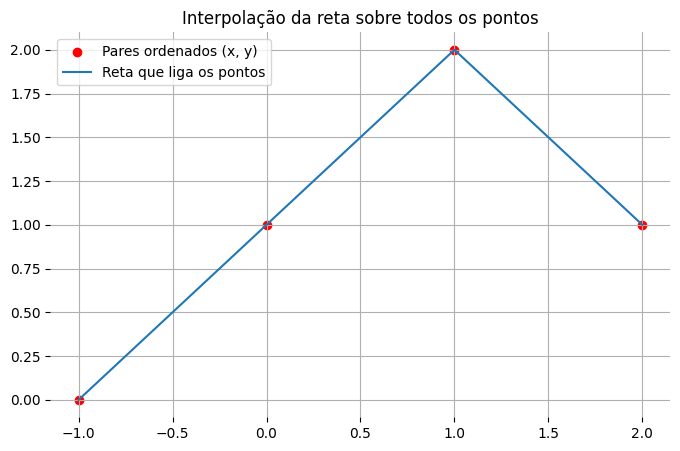

In [20]:
x1, y1 = -1, 0
x2, y2 = 0, 1
x3, y3 = 1, 2
x4, y4 = 2, 1

x = [x1, x2, x3, x4]
y = [y1, y2, y3, y4]

plt.figure(figsize=(8, 5))

plt.scatter(x, y, c='red', label='Pares ordenados (x, y)')
plt.plot(x, y, label='Reta que liga os pontos')
plt.grid(True)
plt.box(False)
plt.legend()
plt.title('Interpolação da reta sobre todos os pontos')

Para achar a reta linear que melhor se ajusta aos pontos usamos a seguinte equação:

$$ y = m \cdot x + n$$

Precisamos encontrar m e n de tal maneira que a reta se ajuste melhor aos pontos (x, y). Para isso vamos usar a equação fundamental da Álgebra Linear:

$$ A \cdot X = Y$$

Para achar os valores de A eu preciso resolver a equação y = mx + n substituindo os valores de x e y e encontrando os coeficientes. O coeficiente de n sempre será 1. Por exemplo: 

- Para os pontos (-1, 0) temos 0 = -1m + 1n -> coeficientes (-1, 1)
- Para os pontos (0, 1) temos 1 = 0m + 1n -> coeficientes (0, 1)
- Para os pontos (1, 2) temos 2 = 1m + 1n -> coeficientes (1, 1)
- Para os pontos (2, 1) temos 1 = 2m + 1n -> coeficientes (2, 1)

In [21]:
A = np.array([[-1, 1], [0, 1], [1, 1], [2, 1]])
y = np.array([[y1], [y2], [y3], [y4]])

print(f"\nMatriz A:\n{A}")
print(f"\nMatriz Y:\n{y}")


Matriz A:
[[-1  1]
 [ 0  1]
 [ 1  1]
 [ 2  1]]

Matriz Y:
[[0]
 [1]
 [2]
 [1]]


Agora precisamos achar os valores de m e n (minhas incógnitas X). Para isso usaremos:

$$ X = (A^T \cdot A)^{-1} \cdot A^T \cdot Y$$

In [22]:
(m,n) = np.linalg.pinv(A.T@A)@A.T@y
print(f"\nValor de m:\n{m[0]}")
print(f"\nValor de n:\n{n[0]}")


Valor de m:
0.40000000000000013

Valor de n:
0.8


array([[-0.3, -0.1,  0.1,  0.3],
       [ 0.4,  0.3,  0.2,  0.1]])

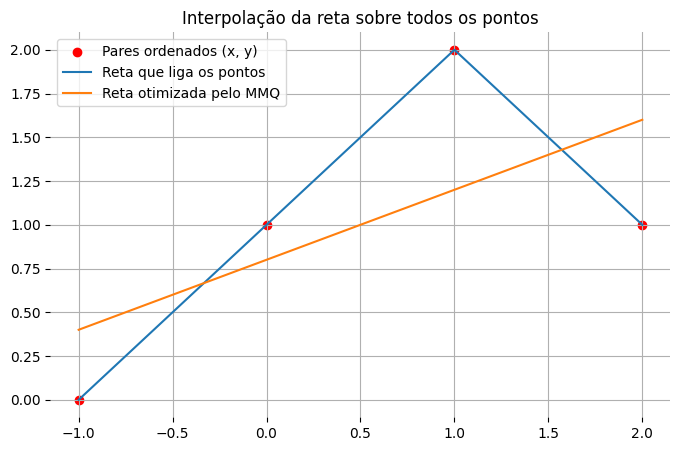

In [23]:
v_x = np.linspace(-1, 2)

plt.figure(figsize=(8, 5))

plt.scatter(x, y, c='red', label='Pares ordenados (x, y)')
plt.plot(x, y, label='Reta que liga os pontos')
plt.plot(v_x, (m*v_x + n), label='Reta otimizada pelo MMQ')
plt.grid(True)
plt.box(False)
plt.legend()
plt.title('Interpolação da reta sobre todos os pontos');

Podemos usar a mesma técnica, só que agora pensando em uma função quadrática:

$$ y = m \cdot x^2 + n \cdot x + p$$

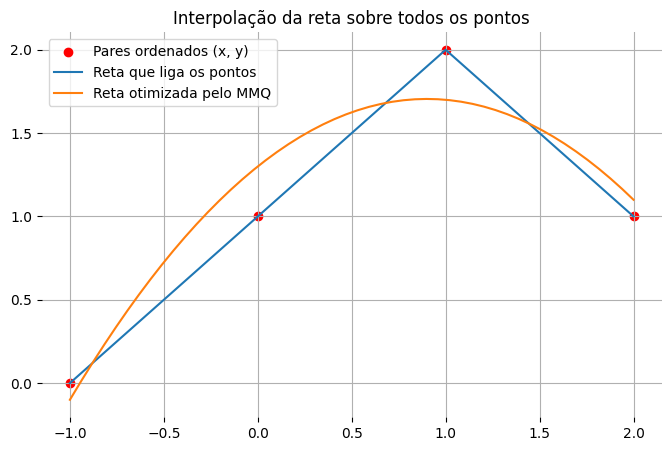

In [41]:
x1, y1 = -1, 0
x2, y2 = 0, 1
x3, y3 = 1, 2
x4, y4 = 2, 1

x = [x1, x2, x3, x4]
y = [y1, y2, y3, y4]

A = np.array([[1, -1, 1], [0, 0, 1], [1, 1, 1], [4, 2, 1]])
y = np.array([[y1], [y2], [y3], [y4]])

(m,n,p) = np.linalg.pinv(A.T@A)@A.T@y

v_x = np.linspace(-1, 2)

plt.figure(figsize=(8, 5))

plt.scatter(x, y, c='red', label='Pares ordenados (x, y)')
plt.plot(x, y, label='Reta que liga os pontos')
plt.plot(v_x, (m*v_x**2 + n*v_x + p), label='Reta otimizada pelo MMQ')
plt.grid(True)
plt.box(False)
plt.legend()
plt.title('Interpolação da reta sobre todos os pontos');